# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. Below we show filled in solutions to the empty cells in the prompt document.

First off, let's load the dataset through torchvision.

In [2]:
import torch
from torchvision import datasets, transforms
import helpers

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /Users/big-daddy/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /Users/big-daddy/.pytorch/F_MNIST_data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /Users/big-daddy/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /Users/big-daddy/.pytorch/F_MNIST_data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /Users/big-daddy/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /Users/big-daddy/.pytorch/F_MNIST_data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /Users/big-daddy/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /Users/big-daddy/.pytorch/F_MNIST_data/FashionMNIST/raw



Here we can see one of the images.

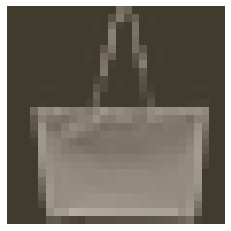

In [3]:
image, label = next(iter(trainloader))
helpers.imshow(image[0,:]);

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [4]:
from torch import nn, optim
import torch.nn.functional as F

In [32]:
# TODO: Define your network architecture here
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 16)
        self.fc4 = nn.Linear(16, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) (something like `nn.CrossEntropyLoss` or `nn.NLLLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [33]:
# TODO: Create the network, define the criterion and optimizer
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [34]:
# TODO: Train the network here
epochs = 5

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.5260619152265825
Training loss: 0.39186978381452786
Training loss: 0.35448652024525823
Training loss: 0.3241727150230011
Training loss: 0.31152191196582213


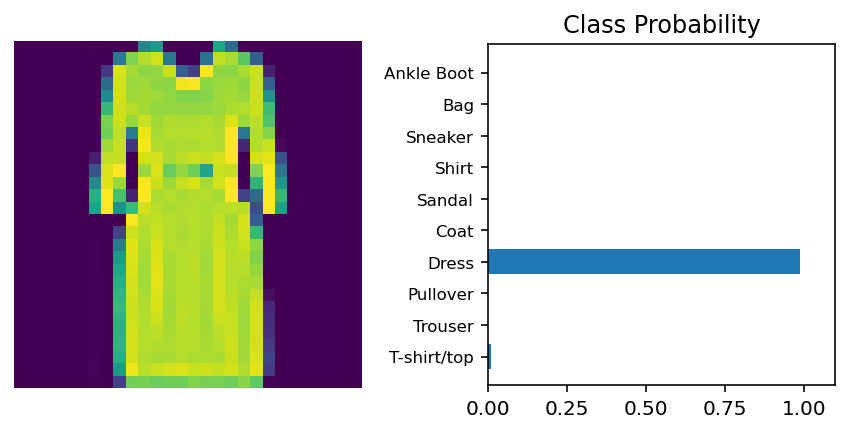

In [35]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helpers

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[1]

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilities
helpers.view_classify(img, ps, version='Fashion')

## Part A ##

We will use 4 layers with 784 units for the first layer, 256 units for the second layer, 128 units for the third layer, and 64 units for the fourth layer. The last layer will output to our results units that will notify us if the neural network distinguished the image correctly. 

Each layers breaks the image into smaller and smaller parts. So our first layer breaks the image into a dimension of  28x28 pixels. It then decides what value to set each unit (in our case black= -1, and white = 1). It then passes the results to the next layer, breaking the image into a smaller dimensions of 16x16. Similarly it decides what value to set each unit by the dimension of the image and again the units pass the results to the next layer - 128 units. Again, we break the dimension to 32x4 pixels setting each unit to the color of the pixel and pass the results to the next layer, 64 units. The last 8x8 layer will then decide what the image is. 

Classification process improves if you increase the number of units and layers because we analyze more pixel in the image. Having more layers will break the dimension of the image more and more. Adding more units will increase the number of pixels to observe therefore increasign the accuracy. 

I believe the brain works like this however, depending on the quality of our eyesight it can only create as much units as our eyesight allows us. If we have better eyesight better classification and vice versa. 

I think increasing the number of neurons and areas in the visual system will improve our visual computation because we have more area to observe and we can admit more inputs in our visual system which will help us distinguish what we are observing. I think this is similar to good and poor eyesight. 

## Part B ##

Yes, by increasing the learning rate we can get the loss function to be below $0.4$. Additionally by adding more more layers we can increase the loss function to be less than $0.04$. Increasing the learning rate to $20$ increased the loss rate to be no where close to $0.04$. Until I decreased it to $0.005$, the loss rate went below $0.04$. Increasin the layers I was able to get the loss function to be approximately $0.03$. 

Yes, I also notice a speed in the convergence when I increase the learning rate and layers. 